In [94]:
from os import path
from PIL import Image
import tifffile
import cv2
from matplotlib import pyplot as plt
import numpy as np
import h5py


In [84]:
img = tifffile.imread(
    "C:\\Users\\Alireza Vaezi\\Desktop\\Stack01.tif")
im2 = tifffile.imread("C:\\Users\\Alireza Vaezi\\Desktop\\fuck\\stack1.tif")
print(img[0])
print(im2[0])


[[13 25 23 ... 36 29  0]
 [14 27 29 ... 35 34  0]
 [12 30 26 ... 31 24  0]
 ...
 [12 36 27 ... 29 24  0]
 [15 29 26 ... 27 30  0]
 [12 30 27 ... 23 28  0]]
[[10 18 17 ... 27 21  0]
 [10 20 22 ... 26 25  0]
 [ 9 22 19 ... 23 18  0]
 ...
 [ 9 27 20 ... 22 18  0]
 [11 21 19 ... 20 22  0]
 [ 9 22 20 ... 17 21  0]]


97
72


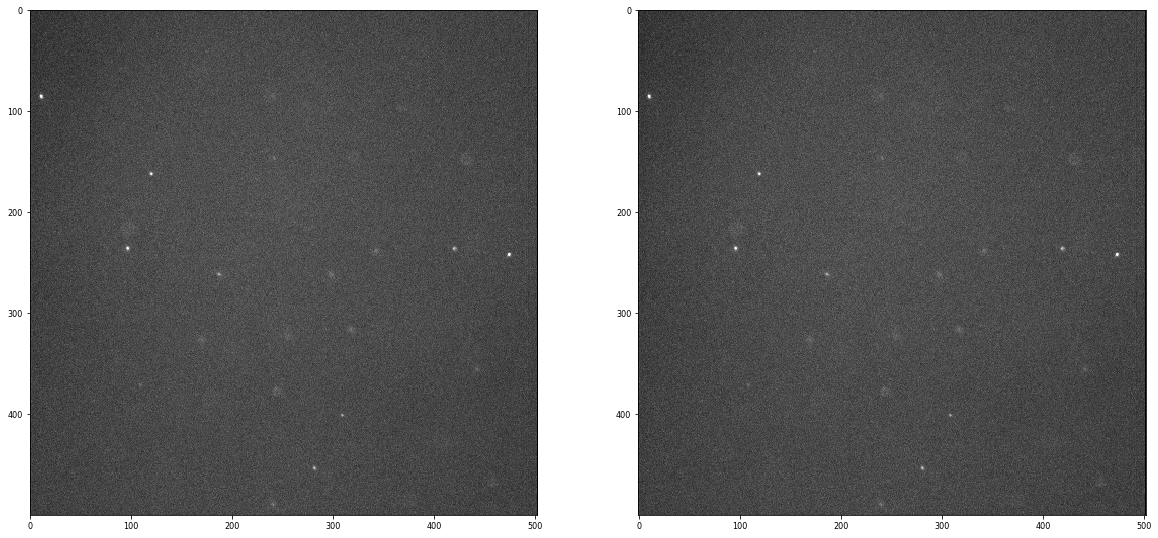

In [93]:
fig, axs = plt.subplots(1, 2, figsize=(20, 10))
axs[0].imshow(img[20], interpolation="nearest", cmap="gray")
axs[1].imshow(im2[20], interpolation="nearest", cmap="gray")
print(img[10].max())
print(im2[10].max())

In [56]:
imgseq = tifffile.TiffSequence(
    'C:\\Users\\Alireza Vaezi\\Desktop\\Toxo Data\\gray_slides\\01*.tif', pattern=r'(t)(\d+)(z)(\d+)')


In [67]:
arr = imgseq.asarray()

In [71]:
tifffile.imsave("C:\\Users\\Alireza Vaezi\\Desktop\\stack1.tif",arr[0,...])

In [107]:
f = h5py.File("C://users/Alireza Vaezi//Desktop//PreProcessing//Stack01.h5",'r')


In [108]:
dset = f['raw']
data = np.array(dset[:, :, :])
file = 'test.jpg'


In [113]:
tifffile.imsave("C:\\Users\\Alireza Vaezi\\Desktop\\fffff.tif",data)


In [114]:
f.close()